### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    3530903_70302: Mercedes<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
auto_data = pd.read_csv("audi.csv")

### Предварительный анализ

In [3]:
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [4]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


<AxesSubplot:>

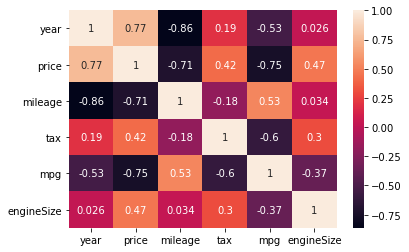

In [6]:
sns.heatmap(auto_data.corr(method="spearman"), annot=True)

### Кодирование нечисловых признаков

In [7]:
auto_data_enc = pd.get_dummies(auto_data, columns=["model", "transmission", "fuelType", "engineSize"])
auto_data_enc.head()

,year,price,mileage,tax,mpg,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,...,engineSize_2.5,engineSize_2.7,engineSize_2.9,engineSize_3.0,engineSize_3.2,engineSize_4.0,engineSize_4.1,engineSize_4.2,engineSize_5.2,engineSize_6.3
0,2017,12500,15735,150,55.4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Выбор столбца-ответа

In [8]:
X, Y = auto_data_enc.drop(["price"], axis=1), auto_data_enc["price"]

### Разделение выборки на тренировочную и тестовую

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,year,mileage,tax,mpg,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,...,engineSize_2.5,engineSize_2.7,engineSize_2.9,engineSize_3.0,engineSize_3.2,engineSize_4.0,engineSize_4.1,engineSize_4.2,engineSize_5.2,engineSize_6.3
3923,2016,48891,0,74.3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2745,2020,582,145,33.2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7184,2019,3346,145,51.4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4910,2019,3979,145,51.4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6793,2017,32523,145,56.5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2018,7442,145,52.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7291,2015,57841,30,57.6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1344,2019,5423,145,55.4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7293,2017,36397,150,42.8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Стандартизация

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
transformer = ColumnTransformer([
#         ("std", StandardScaler(), ["mileage", "tax", "mpg", "year", "engineSize"])
        ("std", StandardScaler(), ["mileage", "tax", "mpg", "year"])
    ], remainder="passthrough")

X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [11]:
import sklearn.metrics as metrics

### Упростим оценку моделей

In [12]:
def regression_report(predictions):
    mae = metrics.mean_absolute_error(Y_test, predictions)
    rmse = metrics.mean_squared_error(Y_test, predictions, squared=False)
    r2 = metrics.r2_score(Y_test, predictions)
    
    print(f"MAE = {mae}")
    print(f"RMSE = {rmse}")
    print(f"R^2 score = {r2}")
    
    plt.figure(figsize=(4, 4))
    plt.scatter(predictions, Y_test)
    plt.xlabel("Predictions")
    plt.ylabel("Target")

### LinearRegression

MAE = 2383.5253252255707
RMSE = 3301.655679531613
R^2 score = 0.9159504387737685


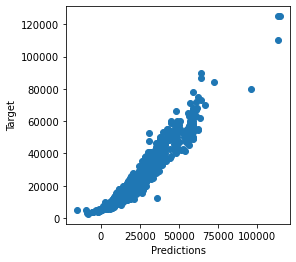

In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_predictions = lr.predict(X_test)

regression_report(lr_predictions)

### Ridge

MAE = 2382.857136360643
RMSE = 3301.9680557376987
R^2 score = 0.9159345338293222


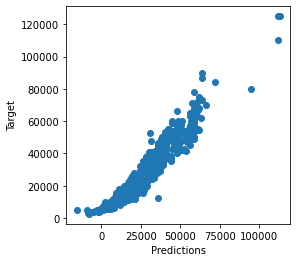

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)
ridge_predictions = ridge.predict(X_test)

regression_report(ridge_predictions)

### RidgeCV

MAE = 2382.8571363523088
RMSE = 3301.968055737516
R^2 score = 0.9159345338293314


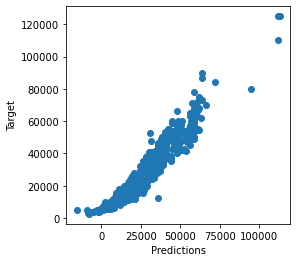

In [15]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV()
ridge_cv.fit(X_train, Y_train)
ridge_cv_predictions = ridge_cv.predict(X_test)

regression_report(ridge_cv_predictions)

### Lasso

MAE = 2380.8934541924295
RMSE = 3302.989910262905
R^2 score = 0.9158824945802146


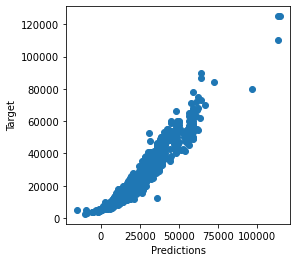

In [16]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, Y_train)
lasso_predictions = lasso.predict(X_test)

regression_report(lasso_predictions)

### LassoCV

MAE = 2398.2269232141857
RMSE = 3331.9954147732533
R^2 score = 0.9143986367895929


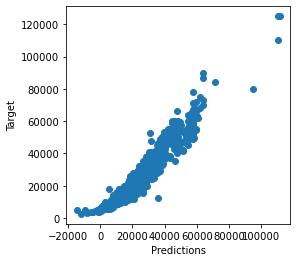

In [17]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV()
lasso_cv.fit(X_train, Y_train)
lasso_cv_predictions = lasso_cv.predict(X_test)

regression_report(lasso_cv_predictions)

### RandomForestRegressor (настроенный)

MAE = 1434.2816977867492
RMSE = 2111.7640214811026
R^2 score = 0.9656155039452593


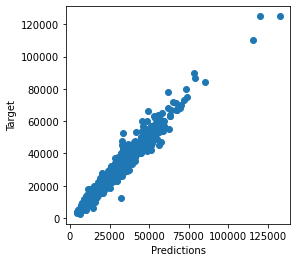

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_jobs=-1,
    random_state=10,
    n_estimators=1300,
    max_features=18,
    criterion="mae",
)
rf.fit(X_train, Y_train)
rf_predictions = rf.predict(X_test)

regression_report(rf_predictions)